In [3]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
import pandas as pd
import os


Using TensorFlow backend.


In [2]:
pip install mtcnn


     |████████████████████████████████| 2.3MB 44kB/s 


In [4]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!unzip '/content/drive/My Drive/train_HNzkrPW (1).zip' -d file_destination


In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/train_HNzkrPW (1).zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [0]:
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
      # get coordinates
      x, y, width, height = result['box']
      # create the shape
      rect = Rectangle((x, y), width, height, fill=False, color='red')
      # draw the box
      ax.add_patch(rect)
    # show the plot
    pyplot.show()


In [8]:
cd 'file_destination/image_data'

/content/file_destination/image_data


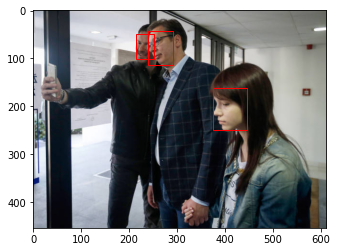

3


In [9]:
filename = '13362.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

print(len(faces))

In [14]:
cd '/content/file_destination'

/content/file_destination


In [0]:
train_labels=[]
train_ds=pd.read_csv('train.csv')


In [16]:
cd '/content/file_destination/image_data'

/content/file_destination/image_data


In [0]:
cal_faces=[]
i=0
for i in range(5733):
    try:
        filename = train_ds.iloc[i][0]
        # load image from file
        pixels = pyplot.imread(filename)
        # create the detector, using default weights
        detector = MTCNN()
        # detect faces in the image
        faces = detector.detect_faces(pixels)
        
        cal_faces.append(len(faces))
        train_labels.append(filename)
        print(i,filename)
        i=i+1
        
    except:
        cal_faces.append(3)
        train_labels.append(filename)
        print(i,filename)

In [0]:
verifying_list=train_ds['HeadCount'].tolist()
#cal_faces


In [0]:
print(len(verifying_list))
print(len(cal_faces))

In [0]:
from sklearn.metrics import mean_squared_error 

In [26]:
print((mean_squared_error(cal_faces,verifying_list))**(1/2)) 


1.3207147529172123


In [10]:
cd'/content/file_destination'

/content/file_destination


In [0]:
test_ds=pd.read_csv('test_Rj9YEaI.csv')


In [0]:
test_ds

In [14]:
cd'/content/file_destination/image_data'

/content/file_destination/image_data


In [15]:
test_labels=[]
cal_test_faces=[]
i=0
for i in range(2463):
    try:
        filename = test_ds.iloc[i][0]
        # load image from file
        pixels = pyplot.imread(filename)
        # create the detector, using default weights
        detector = MTCNN()
        # detect faces in the image
        faces = detector.detect_faces(pixels)
        
        cal_test_faces.append(len(faces))
        test_labels.append(filename)
        print(i,filename)
        
    except:
        cal_test_faces.append(3)
        test_labels.append(filename)
        print(i,filename)

0 10005.jpg
1 10009.jpg
2 10015.jpg
2460 18199.jpg
2461 18202.jpg
2462 18206.jpg


In [0]:
test_labels

In [0]:
cal_test_faces=pd.DataFrame(cal_test_faces)
test_labels=pd.DataFrame(test_labels)

new_df=pd.concat([test_labels,cal_test_faces],axis=1,sort=False)

In [0]:
new_df.to_csv('new_df.csv')

In [0]:
from google.colab import files
files.download("new_df.csv")